In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyMELTScalc as M

import sys
sys.path.append(r"/Users/gleesonm/Library/CloudStorage/GoogleDrive-gleesonm@berkeley.edu/My Drive/2022/GitHub/pyMELTScalc/MELTS")

M.__version__

'0.1.28'

In [3]:
# used to suppress MELTS outputs in MacOS systems (run twice)
import os
sys.stdout = open(os.devnull, 'w')
sys.stderr = open(os.devnull, 'w')

In [4]:
bulk = {'SiO2_Liq': 77.6,
       'TiO2_Liq': 0.09,
       'Al2O3_Liq': 12.3,
       'FeOt_Liq': 0.65,
       'MgO_Liq': 0.02,
       'CaO_Liq': 0.41,
       'Na2O_Liq': 4.49,
       'K2O_Liq': 4.69}

In [ ]:
Results = M.find_mineral_cosaturation(
    bulk = bulk, Model = "MELTSv1.0.2",
    phases = ['quartz1', 'plagioclase1', 'k-feldspar1'],
    P_bar = np.linspace(250, 5000, 32), T_initial_C = 900,
    H2O_sat = True, find_min = True, fO2_buffer = "NNO")

In [5]:
import time
import multiprocessing

P_bar = np.linspace(250, 5000, 32)
phases = ['quartz1', 'plagioclase1', 'k-feldspar1']

c = np.array([1,2,4,8,16,32])
t = np.zeros(len(c))
for i in range(len(c)):
    if c[i] > multiprocessing.cpu_count():
        t[i] = np.nan
    else:
        Start = time.time()
        Results = M.find_mineral_cosaturation(bulk = bulk, 
                                        cores = c[i],
                                        Model = "MELTSv1.0.2",
                                        phases = phases,
                                        P_bar = P_bar, 
                                        T_initial_C = 900,
                                        H2O_Sat = True,
                                        find_min = True,
                                        fO2_buffer = "NNO")
        t[i] = time.time() - Start

# load in time constraints for when this code was run on different machines
# lenovo P620
t_P620 = np.array([96.53, 50.55, 27.87, 19.29, 16.13, 14.13])

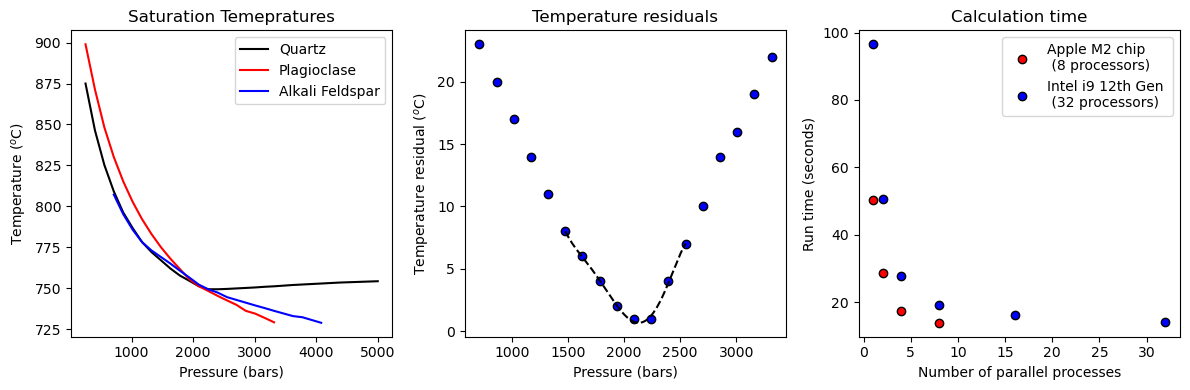

In [6]:
f, a = plt.subplots(1,3, figsize = (12,4))
a[0].set_title('Saturation Temepratures')
a[0].plot(P_bar, Results['quartz1'][0,0,:], '-k', label = 'Quartz')
a[0].plot(P_bar, Results['plagioclase1'][0,0,:], '-r', label = 'Plagioclase')
a[0].plot(P_bar, Results['k-feldspar1'][0,0,:], '-b', label = 'Alkali Feldspar')
a[0].legend()
a[0].set_ylabel('Temperature ($^o$C)')
a[0].set_xlabel('Pressure (bars)')

a[1].set_title('Temperature residuals')
a[1].plot(P_bar, Results['3 Phase Saturation'][0,0,:], 'ok', mfc = 'b')
a[1].plot(Results['CurveMin']['3 Phase Saturation']['P_new'], Results['CurveMin']['3 Phase Saturation']['y_new'], '--k')
a[1].set_ylabel('Temperature residual ($^o$C)')
a[1].set_xlabel('Pressure (bars)')

a[2].set_title('Calculation time')
a[2].plot(c, t, 'o', mfc = 'r', mec = 'k', label = 'Apple M2 chip \n (8 processors)')
a[2].plot(c, t_P620, 'o', mfc = 'b', mec = 'k', label = 'Intel i9 12th Gen \n (32 processors)')
a[2].set_ylabel('Run time (seconds)')
a[2].set_xlabel('Number of parallel processes')
a[2].legend()

f.tight_layout()

In [6]:
f.savefig("BarometryExample.svg", format='svg', dpi=1200)